In [1]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransform

data = Table.read('data_PAH&ANG&shock&PAHcon_removed.fits')
PAH1 = Table.read('PAH_1.fits')
PAH2 = Table.read('PAH_2.fits')
AGN = Table.read('AGN.fits')
shock = Table.read('shock.fits')
PAHcon = Table.read('PAHcon.fits')

In [3]:
x = data['mag4_5']-data['mag5_8']
y = data['mag3_6']-data['mag4_5']

YSO_index = []


for i in range(0,len(data)):
    if x[i] > 0.7:
        if y[i] > 0.7:
            if data['d3_6m'][i]<0.2:
                if data['d4_5m'][i]<0.2:
                    if data['d5_8m'][i]<0.2:
                        if data['d8_0m'][i]<0.2:
                                YSO_index.append(i)
                                
data[YSO_index].write('YSO.fits')  
print(len(YSO_index))

20800


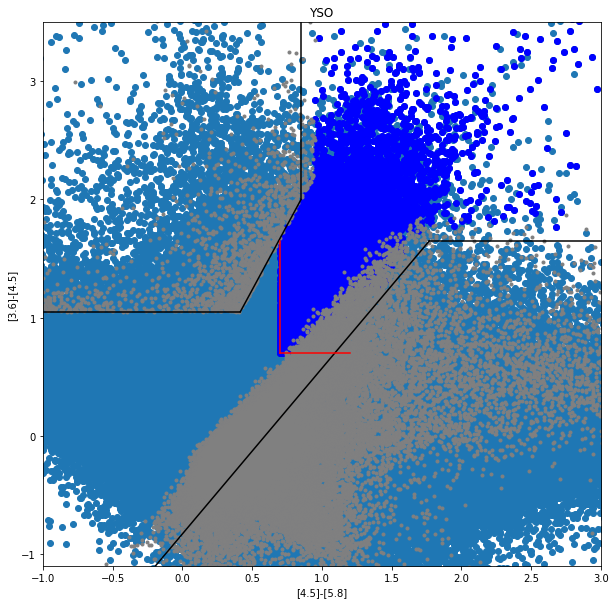

In [4]:
plt.figure(figsize=(10,10))

plt.scatter(x,y)
plt.scatter(x[YSO_index],y[YSO_index], color = 'b')

#plt.scatter(PAH1['__4_5_']-PAH1['__5_8_'],PAH1['__3_6_']-PAH1['__4_5_'],color='grey',marker='.')
#plt.scatter(PAH2['__4_5_']-PAH2['__5_8_'],PAH2['__3_6_']-PAH2['__4_5_'],color='grey',marker='.')
#plt.scatter(AGN['__4_5_']-AGN['__5_8_'],AGN['__3_6_']-AGN['__4_5_'],color='grey',marker='.')
plt.scatter(shock['mag4_5']-shock['mag5_8'],shock['mag3_6']-shock['mag4_5'],color='grey',marker='.')
plt.scatter(PAHcon['mag4_5']-PAHcon['mag5_8'],PAHcon['mag3_6']-PAHcon['mag4_5'],color='grey',marker='.')
plt.plot([-4.5, 0.415], [1.05, 1.05], color = 'black') 
plt.plot([0.85,0.85],[4,2] , color = 'black') #[5.8] − [8.0] > 1
plt.plot([0.415,0.85],[1.05,2], color = 'black')

plt.plot([1.77,6],[1.65,1.65], color = 'black')
plt.plot([-0.3,1.77],[-1.25,1.65], color = 'black')

plt.plot([0.7,1.2],[0.7,0.7],color = 'r')
plt.plot([0.7,0.7],[1.65,0.7],color = 'r')
plt.xlabel('[4.5]-[5.8]')
plt.ylabel('[3.6]-[4.5]')
plt.xlim(-1, 3)
plt.ylim(-1.1,3.5)
plt.title('YSO')

data.remove_rows(YSO_index)
data.write('data_PASP&YSO_removed.fits')